In [6]:
!git clone https://github.com/jhartquist/fastai_audio

fatal: destination path 'fastai_audio' already exists and is not an empty directory.


In [9]:
%cd fastai_audio/fastai_audio

/content/fastai_audio/fastai_audio


In [10]:
!ls

audio_clip.py  data.py	__init__.py  learner.py  metrics.py  transform.py  tta.py


In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch
from fastai.metrics import accuracy
from fastai.torch_core import *
from fastai.audio import *
from fastai.vision import models

ImportError: ignored

In [19]:
import transform

In [4]:
fname = '/content/drive/Shareddrives/Senior Project I/Dataset/donateacry-corpus-master/donateacry_corpus_cleaned_and_updated_data/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'
samples, sample_rate = librosa.load(fname)

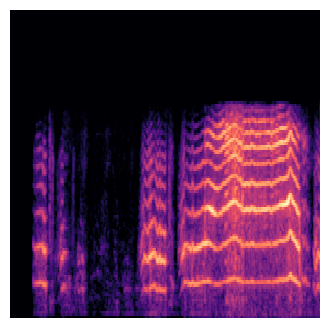

In [4]:
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [ ]:
n_fft = 2048 # output of fft will have shape [1024 x n_frames]
n_hop = 512  # 50% overlap between frames
n_mels = 128 # compress 2048 dimensions to 128 via mel frequency scale
sample_rate = 16000

tfms = transform.get_frequency_batch_transforms(n_fft=n_fft, n_hop=n_hop,
                                      n_mels=n_mels, sample_rate=sample_rate)

batch_size = 64
data = (AudioItemList.from_folder(CRYING_PATH)
        .split_by_folder()
        .label_from_folder()
        .databunch(bs=batch_size, tfms=tfms, equal_lengths=False))

learn = create_cnn(data, models.resnet34, metrics=accuracy)

learn.lr_find(start_lr=0.001, end_lr=1)
learn.recorder.plot()